In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("student-mat.csv", delimiter = ';')
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [4]:
df #데이터 확인

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [5]:
#column명 확인
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

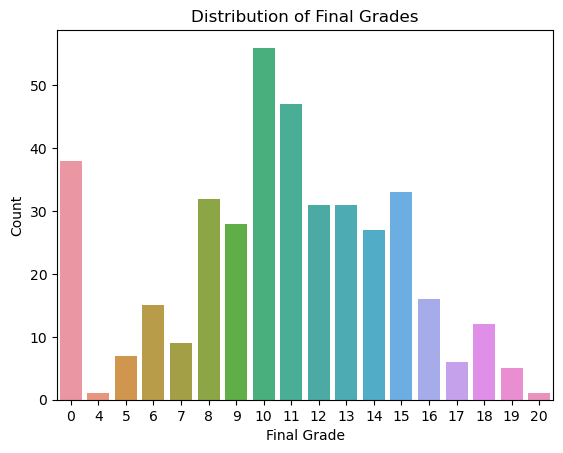

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data=df, x="G3")
plt.xlabel("Final Grade")
plt.ylabel("Count")
plt.title("Distribution of Final Grades")
plt.show()

 #최종 점수(G3) 분포와 해당 등급을 받은 학생 수(Count)

In [7]:
# 레이블 갯수 확인 (숫자)
df['G3'].value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

In [8]:
df.isnull().sum #결측치는 좋은 성능을 위해서 전치리과정에서 처리 고려대상이다. 

<bound method NDFrame._add_numeric_operations.<locals>.sum of      school    sex    age  address  famsize  Pstatus   Medu   Fedu   Mjob  \
0     False  False  False    False    False    False  False  False  False   
1     False  False  False    False    False    False  False  False  False   
2     False  False  False    False    False    False  False  False  False   
3     False  False  False    False    False    False  False  False  False   
4     False  False  False    False    False    False  False  False  False   
..      ...    ...    ...      ...      ...      ...    ...    ...    ...   
390   False  False  False    False    False    False  False  False  False   
391   False  False  False    False    False    False  False  False  False   
392   False  False  False    False    False    False  False  False  False   
393   False  False  False    False    False    False  False  False  False   
394   False  False  False    False    False    False  False  False  False   

      Fjob  .

In [9]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


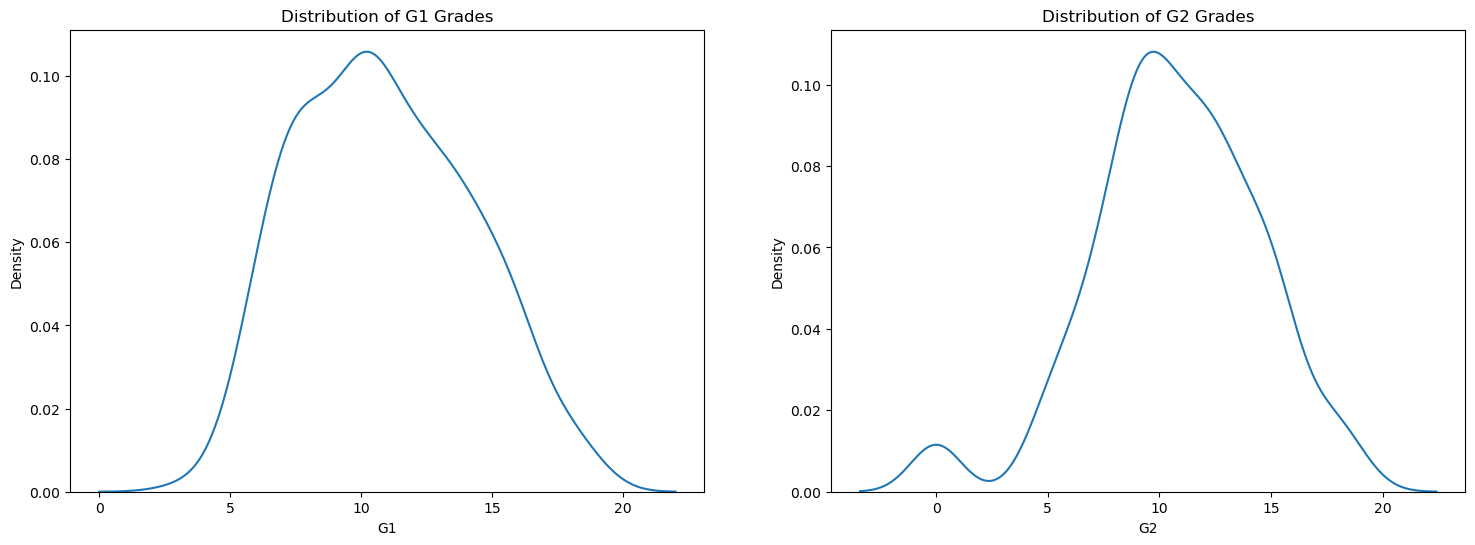

In [10]:
#이제 모든 항목에서 결측치는 존재하지 않는다. 

# 컬럼별 히스토그램 확인
# 'mean radius'와'mean texture' 칼럼을 선택

figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['G1'], kde=True, hist=False, ax=ax1)
ax1.set_title('Distribution of G1 Grades')

ax2 = plt.subplot(1,2,2)
sns.distplot(df['G2'], kde=True, hist=False, ax=ax2)
ax2.set_title('Distribution of G2 Grades')

plt.show()

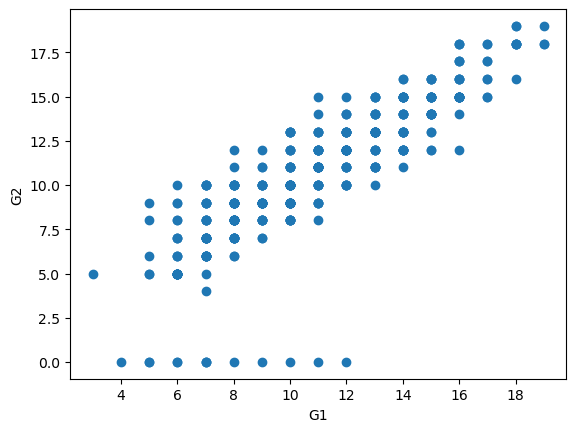

In [11]:
# 산점도 확인

import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['G1'], df['G2'])
plt.xlabel('G1')
plt.ylabel('G2')

plt.show()

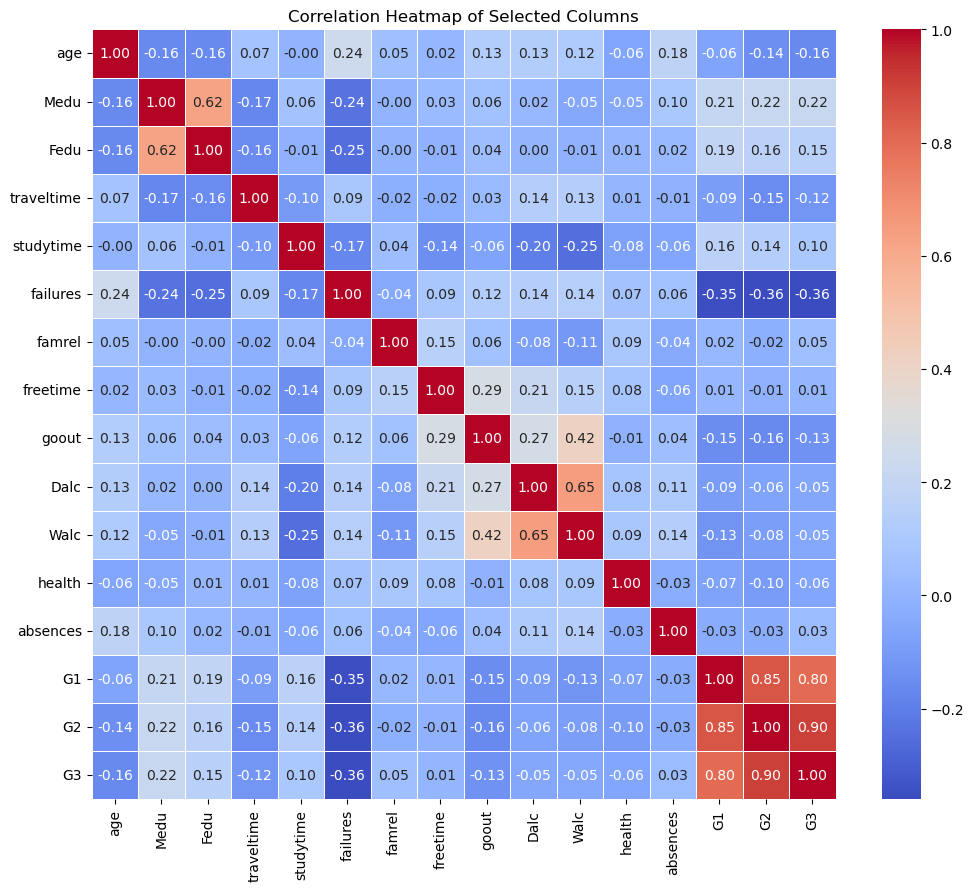

In [12]:
# 선택할 열들을 리스트로 저장합니다.
selected_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                    'absences', 'G1', 'G2', 'G3']

# 선택한 열들에 대한 상관관계를 계산합니다.
correlation = df[selected_columns].corr()

# 상관관계 히트맵을 시각화합니다.
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()


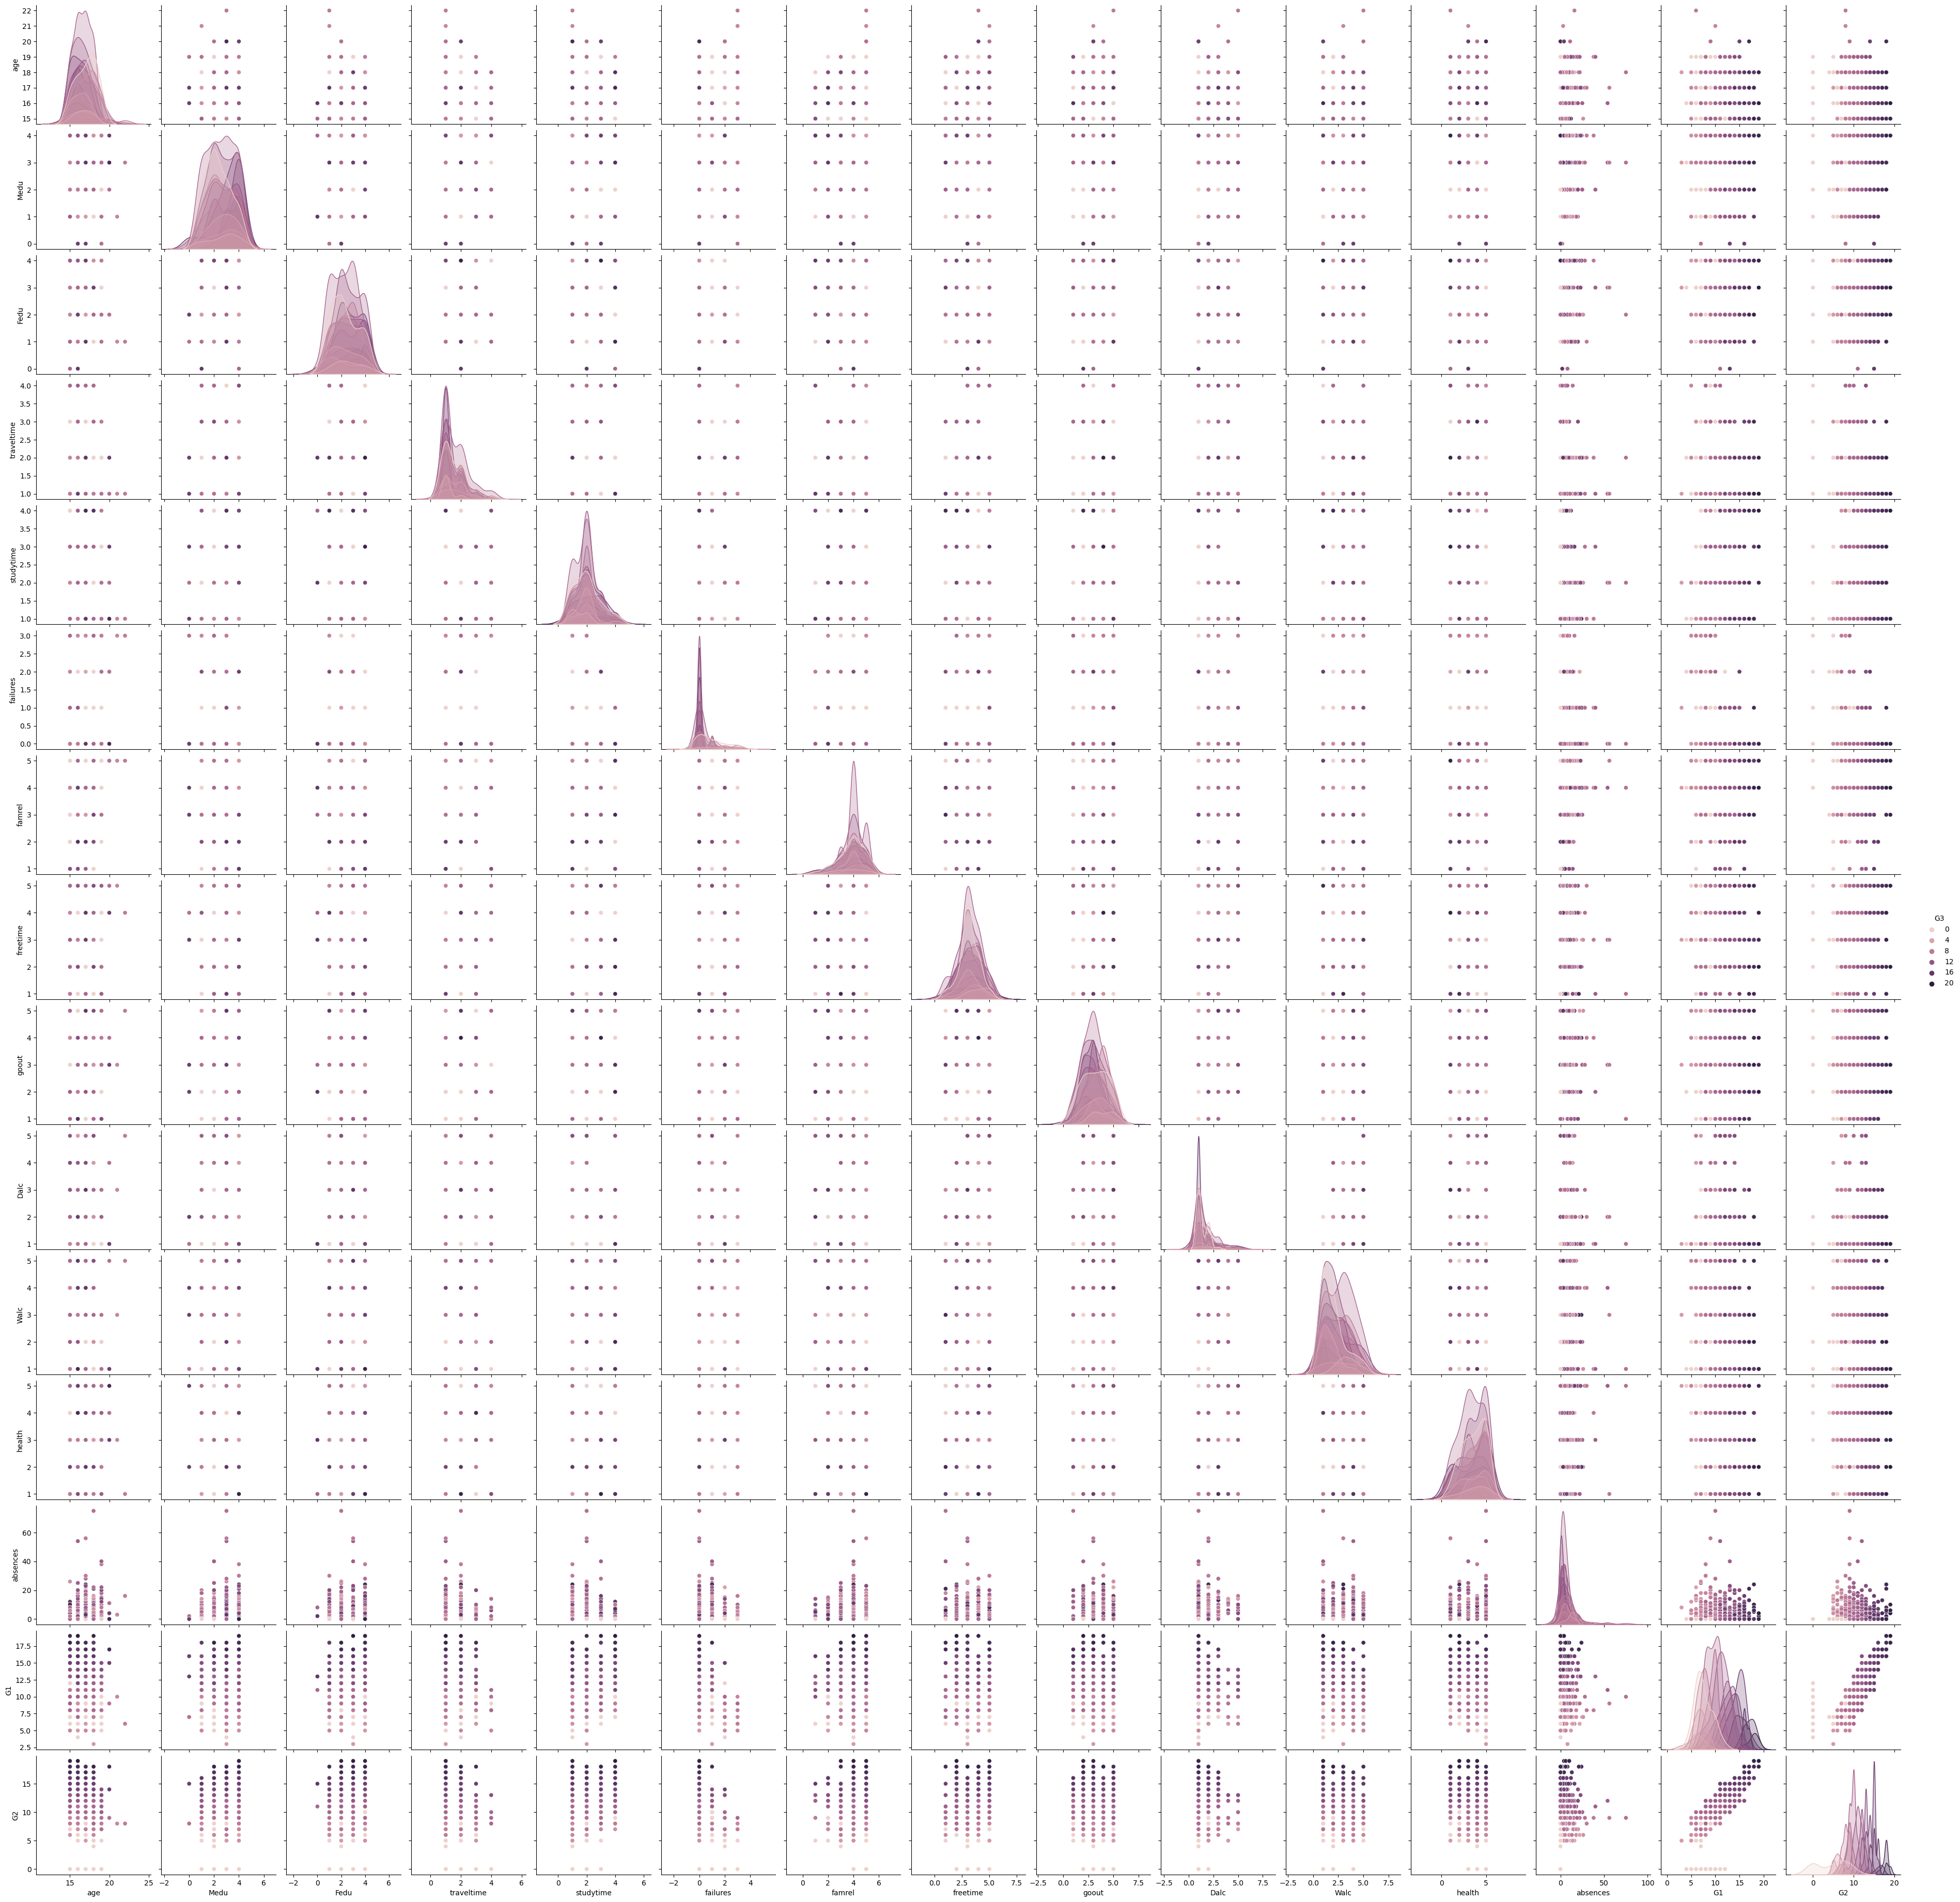

In [13]:
# 상관관계는 두 변수간의 상관 관계를 볼 수 있도록하는데, 1에 가까운 값을 가질 수록 양의 선형 관계가 강하고 0에 가까울수록 두 변수간에 선형 관계는 없다. 



# pairplot를 사용해 각 상관관계 살펴보기

sns.pairplot(df,
             vars=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                    'absences', 'G1', 'G2'],
            hue ='G3')
plt.show()

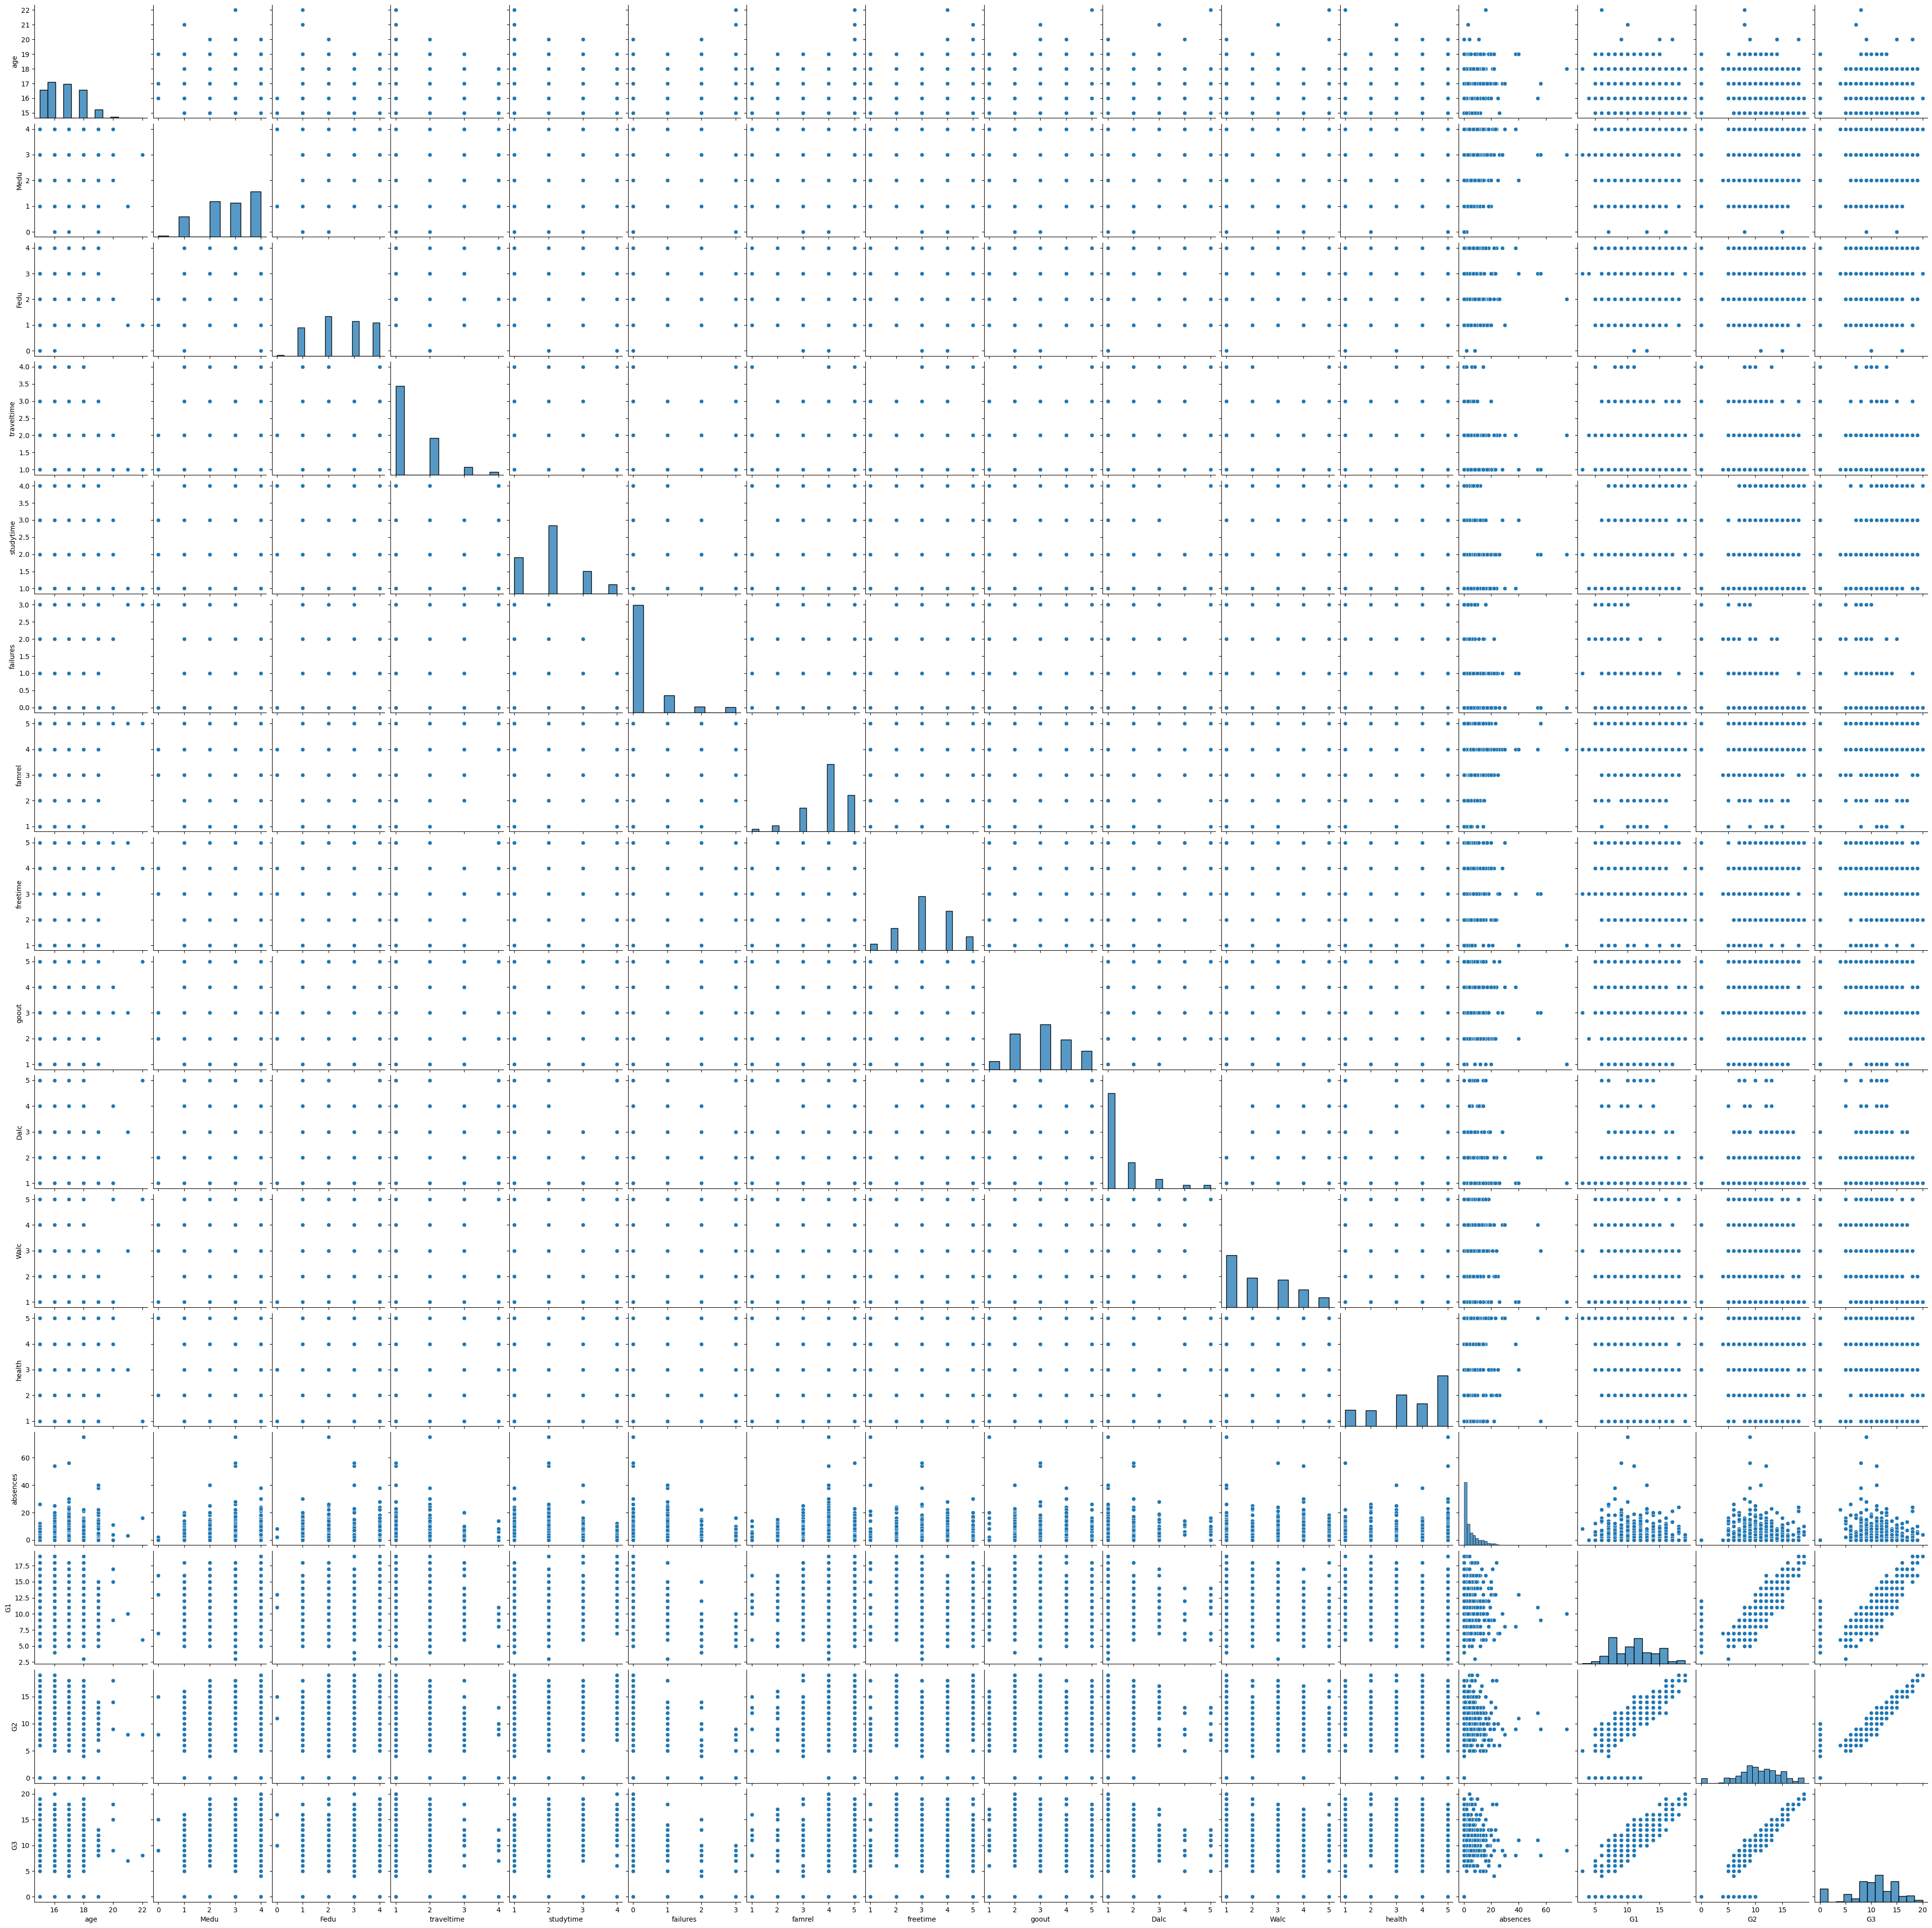

In [14]:
# 선택할 열들을 리스트로 저장합니다.
selected_columns = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                    'absences', 'G1', 'G2', 'G3']

# pair plot을 그립니다.
sns.pairplot(df[selected_columns])
plt.show()


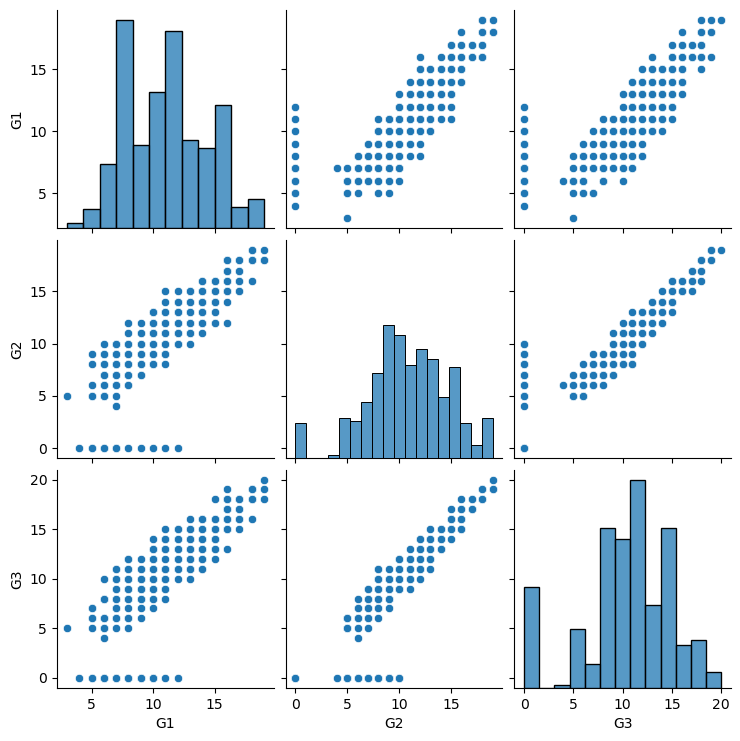

In [15]:
# 선택할 열들을 리스트로 저장합니다.
selected_columns = [ 'G1', 'G2', 'G3']

# pair plot을 그립니다.
sns.pairplot(df[selected_columns])
plt.show()


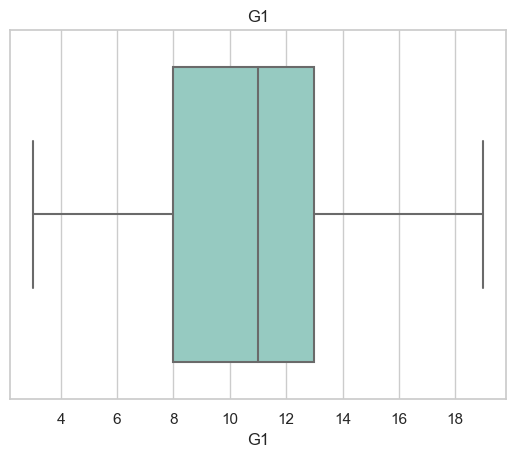

In [16]:
# 특정 칼럼의 범위 확인 및 outlier 확인

sns.set_theme(style="whitegrid")
sns.boxplot(x="G1", data=df, palette="Set3")
plt.title("G1")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_18816\2498552643.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


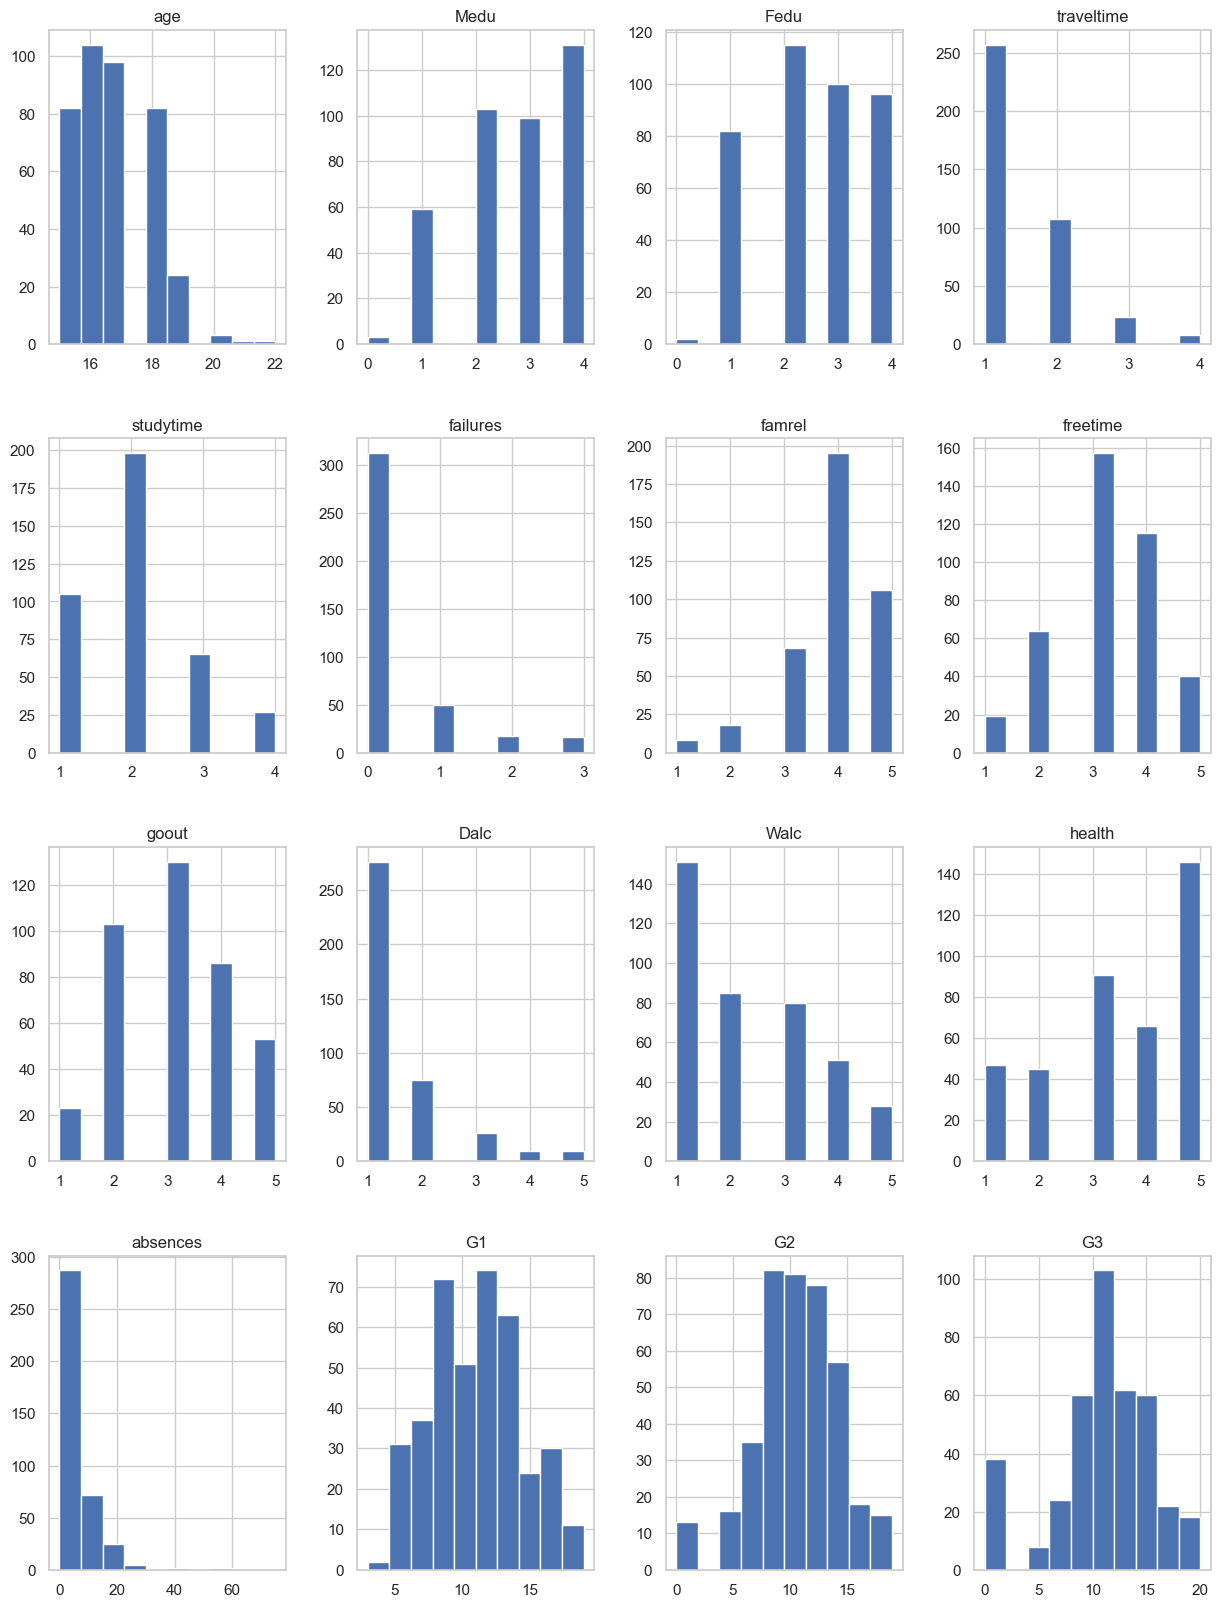

In [17]:
# 각 컬럼별 히스토 그램 확인

fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [30]:
X=df[['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 
                    'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 
                    'absences', 'G1', 'G2', 'G3']]
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,6
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,6
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,10
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,15
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,10


In [19]:
df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [20]:
y=df['G3']
y.value_counts()

10    56
11    47
0     38
15    33
8     32
13    31
12    31
9     28
14    27
16    16
6     15
18    12
7      9
5      7
17     6
19     5
20     1
4      1
Name: G3, dtype: int64

In [21]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [32]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)

In [33]:
clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.43434343434343436
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  6  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  7  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 11  3  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  1  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  2  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  1  5  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  4  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]]


In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [35]:
# Build a logistic regression classifier and predict

clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.48484848484848486
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  1  2  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  3  3  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0 10  2  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  6  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  2  1  1  3  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  3  2  2  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  3  4  2  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  0]]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.494949494949495
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  1  4  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  2  5  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 10  1  1  0  1  0  0  0  0  0]
 [ 0  0  0  0  0  0  1  0  5  0  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  3  1  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1  4  0  2  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  4  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  2  6  0  3  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  4  0  0  1  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  0]]


C:\Users\USER\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [37]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.9595959595959596
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  9  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 11  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  3  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.898989898989899
[[15  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  7  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  8  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 14  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  7  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  5  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  7  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  7  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 10  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  2  1  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  5  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  2  1]]
